Transfer learning does exactly as the name says. The idea is to transfer something learned from one task and apply it to another. Why? Practically speaking, training entire models from scratch every time is inefficient, and its success depends on many factors. Another important reason is that for certain applications, the datasets that are publicly available are not big enough to train a deep architecture like AlexNet or ResNet without over-fitting, which means failing to generalize. Example applications could be online learning from a few examples given by the user or fine-grained classification, where the variation between the classes is minimal.

A very interesting observation is that final layers can be used to work on different tasks, given that you freeze all the rest, whether it be detection or classification, end up having weights that look very similar.

This leads to the idea of transfer learning. This means a deep architecture that is trained on a significantly large amount of data (for example, ImageNet) can generalize so well that its convolutional weights can act as feature extractors, similar to conventional visual representations and can be used to train a linear classifier for various tasks.

This chapter aims to teach the reader how to take readily available trained models, change their structure, and retrain certain layers for specific tasks in TensorFlow. We will see how transfer learning will help improve results and speed up training time.

The main topics covered in this chapter are as follows:

- Pre-initializing a model with weights from another trained model
- Using TensorFlow to load the models and freeze/unfreeze layers when needed

Research has shown that feature extraction in convolutional network weights trained on ImageNet outperforms the conventional feature extraction methods such as SURF, Deformable Part Descriptors (DPDs), Histogram of Oriented Gradients (HOG), and bag of words (BoW). This means that convolutional features can be used equally well wherever the conventional visual representations work, with the only drawback being that deeper architectures might require a longer time to extract the features.

When a deep convolutional neural network is trained on ImageNet the visualization of convolution filters in the first layers (refer to the following illustration) shows that they learn low-level features similar to edge detection filters, while the convolution filters at the last layers learn high-level features that capture the class-specific information. Hence, if we extract the features for ImageNet after the first pooling layer and embed them into a 2D space (using, for example, t-SNE), the visualization will show that there is some anarchy in the data, while if we do the same at fully connected layers, we will notice that the data with the same semantic information gets organized into clusters. This implies that the network generalizes quite well at higher levels, and it will be possible to transfer this knowledge to unseen classes.



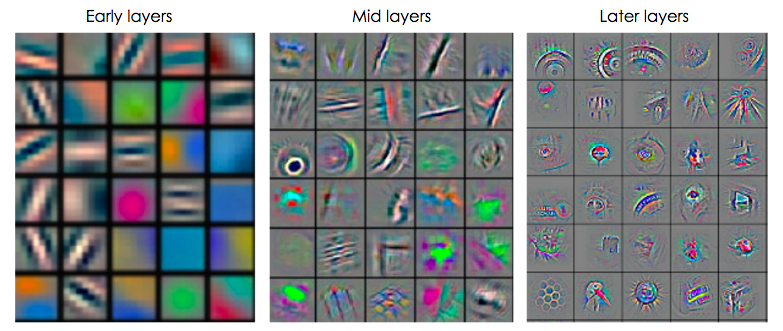

In [1]:
from IPython.display import Image
Image(filename='./images/trans.png') 

According to experiments conducted on datasets with a small degree of similarity with respect to ImageNet, the features based on convolutional neural network weights trained on ImageNet perform better than the conventional feature extraction methods for the following tasks:

- Object recognition: This CNN feature extractor can successfully perform classification tasks on other datasets with unseen classes.
- Domain adaptation: This is when the training and testing data are from different distributions, while the labels and number of classes are the same. Different domains can consider images captured with different devices or in different settings and environment conditions. A linear classifier with CNN features successfully clusters images with the same semantic information across different domains, while SURF features overfit to domain-specific characteristics.
- Fine-grained classification: This is when we want to classify between the subcategories within the same high-level class. For example, we can categorize between bird species. CNN features, along with logistic regression, although not trained on fine-grained data, perform better than the baseline approaches.
- Scene recognition: Here, we need to classify the scene of the entire image. A CNN feature extractor trained on object classification databases with a simple linear classifier on top, outperforms complex learning algorithms applied on traditional feature extractors on recognition data.
Some of the tasks mentioned here are not directly related to image classification, which was the primary goal while training on ImageNet and therefore someone would expect that the CNN features would fail to generalize to unseen scenarios. However, those features, combined with a simple linear classifier, outperform the hand-crafted features. This means that the learned weights of a CNN are reusable.

So when should we use transfer learning? When we have a task where the available dataset is small due to the nature of the problem (such as classify ants/bees). In this case, we can train our model on a larger dataset that contains similar semantic information and subsequently, retrain the last layer only (linear classifier) with the small dataset. If we have just enough data available, and there is a larger similar dataset to ours, pretraining on this similar dataset may result in a more robust model. As normally we train models with the weights randomly initialized, in this case, they will be initialized with the weights trained on this other dataset. This will facilitate the network to converge faster and generalise better. In this scenario, it would make sense to only fine-tune a few layers at the top end of the model.

Rule of thumb is that the more data you have available, the more layers you can train, starting from the top of the network. Initialize your model weights from a pre-trained, for example, on ImageNet, model.

How should we use transfer learning? There are two typical ways to go about this. The first and less timely way, is to use what is known as a pre-trained model, that is, a model that has previously been trained on a large scale dataset, for example, the ImageNet dataset. These pre-trained models are readily available across different deep learning frameworks and are often referred to as "model zoos". The choice of a pre-trained model is largely dependent on what the current task to be solved is, and on the size of the datasets. After the choice of model, we can use all of it or parts of it, as the initialized model for the actual task that we want to solve.

The other, less common way deep learning is to pretrain the model ourselves. This typically occurs when the available pretrained networks are not suitable to solve specific problems, and we have to design the network architecture ourselves. Obviously, this requires more time and effort to design the model and prepare the dataset. In some cases, the dataset to pretrain the network on can even be synthetic, generated from computer graphics engines such as 3D studio Max or Unity, or other convolutional neural networks, such as GANs. The model pretrained on virtual data can be fine-tuned on real data, and it can work equally well with a model trained solely on real data.

If, for example, we want to discriminate between cats and dogs, and we do not have enough data, we can download a network trained on ImageNet from the "model zoo" and use the weights from all but the last of its layers. The last layer has to be adjusted to have the same size as the number of classes, in our case two, and the weights to be reinitialized and trained. In this way, we do what we call freezing of the layers that are not to be trained by setting the learning rate for these layers to zero, or to a very small number (refer to the following figure). In case a bigger dataset is available, we can train the last three fully connected layers. Sometimes, the pretrained network can be used only to initialize the weights and then be trained normally.

Transfer learning works because the features computed at the initial layers are more general and look similar. The features extracted in the top layers become more specific to the problem that we want to solve.

For a further look into how to use transfer learning, and a deeper understanding of the topic, let's take a look at the code.

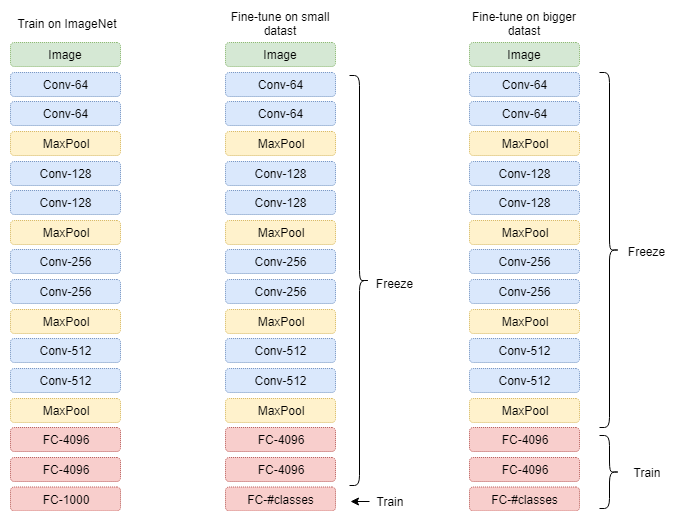

In [2]:
from IPython.display import Image
Image(filename='./images/trans1.png') 